## Uždavinys 1: Spam ir ne-spam klasifikavimas

Jūs turite el. laiškų rinkinį, kuriame yra paženklinti el. laiškai kaip "spam" arba "ne-spam". Naudokite Naive Bayes algoritmą, kad sukurtumėte modelį, kuris galėtų klasifikuoti naujus el. laiškus.

Naudokite duomenis iš šio šaltinio: https://archive.ics.uci.edu/dataset/228/sms+spam+collection

Įkelkite duomenis ir atlikite išankstinį apdorojimą (aptvarkykite duomenis, pasirinkite tik tai ko jums reikia).
Padalinkite duomenis į mokymosi ir testavimo rinkinius.
Sukurkite Naive Bayes modelį naudojant scikit-learn.
Įvertinkite modelio tikslumą naudodami testavimo rinkinį.

In [65]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer


data = pd.read_csv('SMSSpamCollection.csv', sep='\t', header=None, names=['label', 'message'])

print(data)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f'Modelio tikslumas: {accuracy}')

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]
Modelio tikslumas: 0.9919282511210762


## Uždavinys 2

Turite Twitter žinutes, kurios yra paženklintos kaip "positive" arba "negative". Naudokite Naive Bayes algoritmą, kad sukurtumėte modelį, kuris galėtų nustatyti naujų žinučių segmentą (ar žinutė yra negative ar positive).

Naudokite duomenis iš šio šaltinio: https://www.kaggle.com/datasets/kazanova/sentiment140

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('training.1600000.processed.noemoticon.csv', header=None)
data.columns = ['target', 'ids', 'date', 'flag', 'user','text']
data = data[['target', 'text']]
print(data)
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
classifier = MultinomialNB()

model = make_pipeline(vectorizer, classifier)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

         target                                               text
0             0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1             0  is upset that he can't update his Facebook by ...
2             0  @Kenichan I dived many times for the ball. Man...
3             0    my whole body feels itchy and like its on fire 
4             0  @nationwideclass no, it's not behaving at all....
...         ...                                                ...
1599995       4  Just woke up. Having no school is the best fee...
1599996       4  TheWDB.com - Very cool to hear old Walt interv...
1599997       4  Are you ready for your MoJo Makeover? Ask me f...
1599998       4  Happy 38th Birthday to my boo of alll time!!! ...
1599999       4  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 2 columns]
Accuracy: 0.773384375
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78    159494
           4  

## Uždavinys 3

Turite vyno kokybės duomenų rinkinį, kur vynai yra paženklinti kaip "gera" arba "bloga" kokybė. Naudokite Naive Bayes algoritmą, kad sukurtumėte modelį, kuris galėtų klasifikuoti vyno kokybę.

Naudokite duomenis iš šio šaltinio: https://archive.ics.uci.edu/dataset/186/wine+quality

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('winequality-white.csv', sep=';')
# print(data)
data['quality_label'] = data['quality'].apply(lambda x: 'gera' if x >= 7 else 'bloga')

X = data.drop(['quality', 'quality_label'], axis=1)
y = data['quality_label']

print(len(X_train))
print(len(y_train))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Tikslumas: {accuracy}')

# print('Klasifikacija ataskaita:')
# print(classification_report(y_test, y_pred))

1279
1279
Tikslumas: 0.7173469387755103


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('winequality-white.csv', sep=';')
# print(data)
data['quality_label'] = data['quality'].apply(lambda x: 'gera' if x >= 7 else 'bloga')

X = data.drop(['quality', 'quality_label'], axis=1)
y = data['quality_label']

print(len(X_train))
print(len(y_train))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Tikslumas: {accuracy}')



## Uždavinys 4

Turite namų kainų duomenų rinkinį, kuriame pateikiamos įvairios savybės (plotas, kambarių skaičius ir t.t.). Naudokite Linear Regression algoritmą, kad sukurtumėte modelį, kuris galėtų prognozuoti namų kainas.

Naudokite duomenis iš šio šaltinio: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

24.291119474973538
Root Mean Squared Error: 4.928602182665339


<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\edita\AppData\Local\Temp\ipykernel_25084\470667504.py:9: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('housing.csv', sep='\s+', names=column_names )


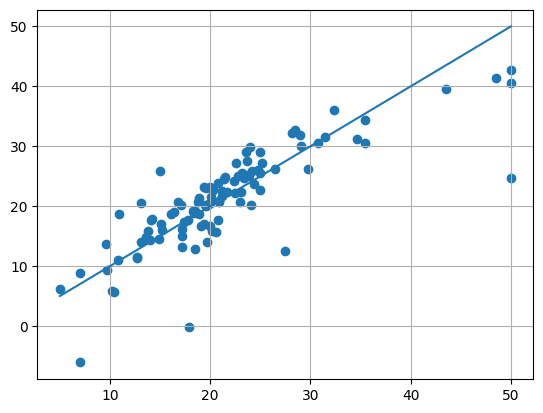

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # naudojamas linijinei regresijai
from sklearn.metrics import mean_squared_error

column_names = [ "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv('housing.csv', sep='\s+', names=column_names )
data.head()

X = data.drop(columns= ['MEDV'])  # MEDV yra kainos stulpelis
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# naudojama linijinė regresija
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#  Įvertinamas modelio tikslumas. Kai yra linijinė regresija taikomas mean_squared_error(y_test, y_pred) metodas
mse = mean_squared_error(y_test, y_pred)
print(mse)
# print(y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

plt.scatter(y_test, y_pred) #nubraižo grafiką iš taškų
# plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])

plt.grid()
plt.show()
# patikriname ar nėra trūkstamų reikšmių
# print(data.isnull().sum())
# # aprašome duomenų statistiką
# print(data.describe())





<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\edita\AppData\Local\Temp\ipykernel_25084\3485626255.py:10: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('housing.csv', sep='\s+', names=column_names )


24.291119474973538


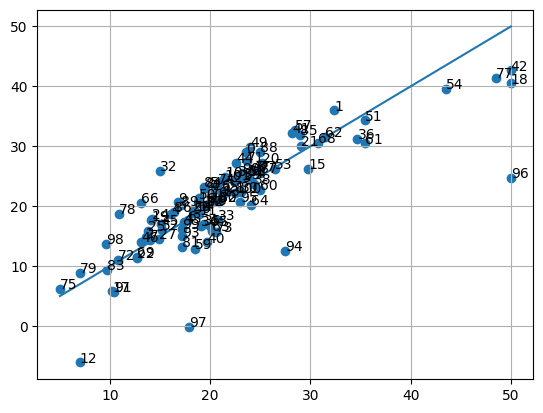

50.0
CRIM         9.2323
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6310
RM           6.2160
AGE        100.0000
DIS          1.1691
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          366.1500
LSTAT        9.5300
Name: 371, dtype: float64
Root Mean Squared Error: 4.928602182665339


In [106]:
# su pakeitimai, kad eitų nustatyti kuri reikšmė grafike yra kurie duomenys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # naudojamas linijinei regresijai
from sklearn.metrics import mean_squared_error

column_names = [ "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv('housing.csv', sep='\s+', names=column_names )
data.head()

X = data.drop(columns= ['MEDV'])  # MEDV yra kainos stulpelis
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# naudojama linijinė regresija
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# print(y_pred)

#  Įvertinamas modelio tikslumas. Kai yra linijinė regresija taikomas mean_squared_error(y_test, y_pred) metodas
mse = mean_squared_error(y_test, y_pred)
print(mse)

for i, n in enumerate(range(len(y_test))):
    plt.annotate(n, (y_test.iloc[i], y_pred[i]))



plt.scatter(y_test, y_pred) #nubraižo grafiką iš taškų
# plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.grid()
plt.show()

print(y_test.iloc[96])
print(X_test.iloc[96])

data.loc[(data['AGE']=='100.0') & (data['MEDV'] == '50.0' )]

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

25.175390536116932


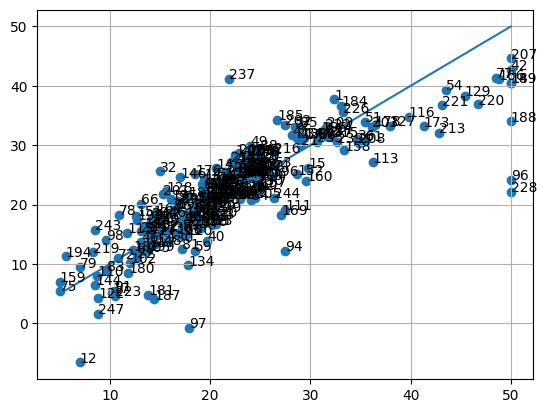

50.0
CRIM         9.2323
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6310
RM           6.2160
AGE        100.0000
DIS          1.1691
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          366.1500
LSTAT        9.5300
Name: 371, dtype: float64
Root Mean Squared Error: 5.017508399207412


In [105]:
# pakeitus test_size=0.5 padidėja taškų skaičius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# naudojama linijinė regresija
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# print(y_pred)

#  Įvertinamas modelio tikslumas. Kai yra linijinė regresija taikomas mean_squared_error(y_test, y_pred) metodas
mse = mean_squared_error(y_test, y_pred)
print(mse)

for i, n in enumerate(range(len(y_test))):
    plt.annotate(n, (y_test.iloc[i], y_pred[i]))

plt.scatter(y_test, y_pred) #nubraižo grafiką iš taškų
# plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.grid()
plt.show()

print(y_test.iloc[96])
print(X_test.iloc[96])

data.loc[(data['AGE']=='100.0') & (data['MEDV'] == '50.0' )]

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

In [109]:
y_pred= model.predict([X.iloc[22]])
X = np.array([[0.85204,   0.00 ,  8.140,  0,  0.5380,  5.9650,  89.20,  4.0123,   4,  307.0,  21.00, 392.53,  13.83,  19.60]])
y_pred_vilnius = model.predict(X)
print(y_pred_vilnius)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

## Uždavinys 5

Turite automobilių savybių duomenų rinkinį (variklio dydis, svoris, ir t.t.), pagal kurį turite prognozuoti automobilių degalų sąnaudas. Naudokite Linear Regression algoritmą.

Naudokite duomenis iš šio šaltinio: https://archive.ics.uci.edu/dataset/9/auto+mpg

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv('auto-mpg.csv', names=column_names, sep='\s+', na_values='?')
data.dropna(inplace=True) 
data.drop('car_name', axis=1, inplace=True)

X = data.drop('mpg', axis=1)
y = data['mpg']
# print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\edita\AppData\Local\Temp\ipykernel_25084\3590339808.py:7: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('auto-mpg.csv', names=column_names, sep='\s+', na_values='?')


Mean Squared Error: 10.170693695667019


In [111]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
146,4,90.0,75.0,2125.0,14.5,74,1
282,4,140.0,88.0,2890.0,17.3,79,1
69,8,350.0,160.0,4456.0,13.5,72,1
378,4,105.0,63.0,2125.0,14.7,82,1
331,4,97.0,67.0,2145.0,18.0,80,3
...,...,...,...,...,...,...,...
101,6,198.0,95.0,2904.0,16.0,73,1
65,8,351.0,153.0,4129.0,13.0,72,1
56,4,91.0,70.0,1955.0,20.5,71,1
262,8,305.0,145.0,3425.0,13.2,78,1


In [117]:
model.predict(X_test)

array([25.95976758, 25.60788501, 10.61225174, 32.30352198, 33.22766006,
       23.48316108, 34.47461471, 25.99032589, 20.50776441, 27.05444489,
       27.75160936, 13.69019408, 25.15139692,  8.72650431, 16.70254202,
       33.11103405, 25.80495335, 12.80029168, 25.52325492, 27.0886937 ,
       20.84163971, 18.01437486, 23.98078035, 27.03960846, 31.56462442,
       11.28411702, 28.75120589, 25.7518709 , 22.99602683, 14.95184549,
       22.59174951, 31.01448494, 24.01032178, 28.21943285, 21.88603845,
       29.44121304, 28.78928643, 12.06170572, 14.85723672, 10.38298149,
       13.9746528 , 34.53168701, 30.78104988, 13.67225119, 30.65909179,
       15.41205519, 30.07959401, 10.68953008, 17.45681417, 22.22045797,
       26.64937081, 15.16906123,  8.72418947, 23.35358172, 31.3835003 ,
       26.14099966, 26.17381276, 20.80790958, 31.86518377, 24.51926846,
       19.22697621, 27.34483458, 31.04997741, 10.40260623, 25.8320082 ,
       16.93945957, 10.40462155, 29.22446655, 21.0593497 , 33.44

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Duomenų įkėlimas
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv('auto-mpg-original.csv', names=column_names, sep='\s+', na_values='?')

# Duomenų valymas
data.dropna(inplace=True)
data.drop('car_name', axis=1, inplace=True)

# Atributų ir tikslinio kintamojo atskyrimas
X = data.drop('mpg', axis=1)
y = data['mpg']

# Duomenų padalijimas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Modelio kūrimas ir mokymas
model = LinearRegression()
model.fit(X_train, y_train)

# Prognozių atlikimas
y_pred = model.predict(X_test)

# Modelio įvertinimas
mse = mean_squared_error(y_test, y_pred)
print(f"Vidutinė kvadratinė klaida: {mse}")

Vidutinė kvadratinė klaida: 10.170693695667019


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\edita\AppData\Local\Temp\ipykernel_25084\2805807742.py:8: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('auto-mpg-original.csv', names=column_names, sep='\s+', na_values='?')


## Uždavinys 6

Turite studentų savybių duomenų rinkinį (amžius, mokykla, studijų valandos ir t.t.), pagal kurį turite prognozuoti studentų galutinius pažymius.

Naudokite duomenis iš šio šaltinio: https://archive.ics.uci.edu/dataset/320/student+performance

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('student-mat.csv', sep=';')
print(data)
# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Define features and target
X = data.drop('G3', axis=1)
y = data['G3']
# print(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

c:\Users\edita\Documents\KURSAI\240319DMO492DIE\mokymai\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Pauliaus sprendimas
d1=pd.read_csv("student-mat.csv",sep=";")
d2=pd.read_csv("student-por.csv",sep=";")
d3=pd.merge(d1,d2,on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
d3.drop(['address'], axis = 1)
atitikmenys = {}
for i in d3.columns.values:
    if type(d3[i][0]) == str:
        values = list(d3[i].unique())
        numeriai = range(len(values))
        atitikmenys[i] = list(zip(numeriai, values))
        d3[i] = d3[i].apply(lambda x: values.index(x))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

target = d3['G3_y']
data = d3.drop('G3_y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(mse)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()